In [8]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tnkeeh as tn
import re


In [7]:
# Load stopwords from the list.txt file
def load_arabic_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    return set(stopwords)

# Path to the list.txt file
stopwords_file = 'arabic-stop-words/list.txt'
arabic_stopwords = load_arabic_stopwords(stopwords_file)

# Example usage
print("Sample stopwords:", list(arabic_stopwords)[:10])


Sample stopwords: ['', 'حجا', 'هن', 'نحن', 'لوما', 'شرع', 'يناير', 'ّأيّان', 'حَذارِ', 'اليوم']


# Load Dataset


In [9]:
table1 = pd.read_csv("table1.csv")
table1.head(10)

,id,text
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...
5,877881537122979840,@alibobkr63 او حتى من اي دين او طائفة. اسف ممك...
6,882940840888471552,@muhamed01111 باهي نستنوه. بلكي مشغول ولا حاجة
7,882941769444466688,@muhamed01111 مهما اختلفنا راه نحنا خوت. والله...
8,882943694906818560,@muhamed01111 بالنسبة ليا انا والله شبعت هم ون...
9,884736569118261248,@Ajo32asLibya @Jed_ly مو نحنا الحياة عندنا مية...


In [11]:
table2 = pd.read_csv("table2.csv")
table2.head(10)

,id,dialect
0,1009754958479151232,LY
1,1009794751548313600,LY
2,1019989115490787200,LY
3,1035479791758135168,LY
4,1035481122921164800,LY
5,877881537122979840,LY
6,882940840888471552,LY
7,882941769444466688,LY
8,882943694906818560,LY
9,884736569118261248,LY


In [12]:
df = pd.merge(table1,table2,on='id')
df.head()

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو ا...,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ...,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بير...,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا...,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ا...,LY


# EDA


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   text     147725 non-null  object
 2   dialect  147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [14]:
df.isnull().sum()

id         0
text       0
dialect    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
# LY - Libya
# LB - Lebanon
# EG - Egypt
# SD -
# MA
df['dialect'].value_counts()

dialect
EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: count, dtype: int64

/tmp/ipykernel_48066/3242380544.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dialect', data=df, palette='viridis')


<Axes: xlabel='dialect', ylabel='count'>

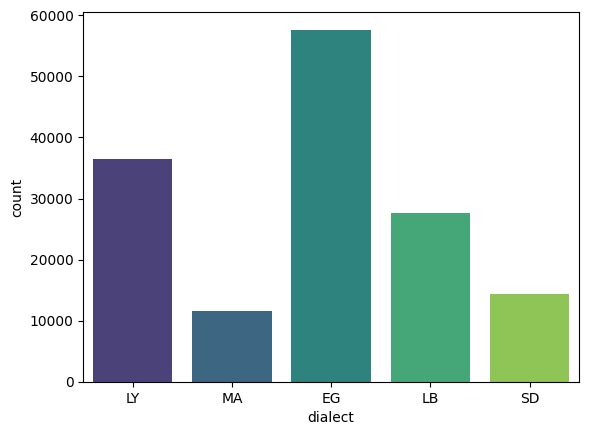

In [17]:
sns.countplot(x='dialect', data=df, palette='viridis')

In [18]:
df.drop(columns=['id'], inplace=True)

In [20]:
df.columns

Index(['text', 'dialect'], dtype='object')

In [21]:
X = df["text"]
y = df["dialect"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (118180,)
Test size: (29545,)


In [22]:
## create dataframe for training data
Train_df = pd.DataFrame({
    'text': X_train,
    'label': y_train
})
     


In [23]:
## create dataframe for testing data
Test_df = pd.DataFrame({
    'text': X_test,
    'label': y_test
})

# Data Preprocessing


In [24]:
Train_df.head()

,text,label
39272,@K7al_L3afta مازالا كاتمشي لتامازيرت؟ ولا ماعن...,MA
43751,@Aichaa__r سستيني صافي 😔😭 قلتها ليك البارح,MA
87351,@ufo_10_1 @MemeMinawya معلش يااشرف للاسف الرؤي...,EG
114903,لبشوف فرحة لاعبين السعودية بقول متأهلين عالنها...,LB
141275,... تشليع الجمعه وبيان فك الإرتباط \nأقرأ الرس...,SD


In [26]:
row = Train_df['text'].loc[140374]
print(row)

@AhmedAwadalla3 @Randa__FMI الناس ديل غايتو بعد كاس العالم عايزين نبدلهم بي بشة و وداد الاتنين بس يدونا دي


In [27]:
## use Tankeeh
cleander = tn.Tnkeeh(remove_diacritics=True,
                     remove_html_elements=True,
                     remove_twitter_meta=True,
                     remove_links=True,
                     remove_english=True,
                     remove_repeated_chars=True,
                     remove_long_words=True,
                     normalize=True
                     )

In [28]:
Train_df = cleander.clean_data_frame(Train_df,'text')
Test_df = cleander.clean_data_frame(Test_df,'text')

In [29]:
row = Train_df['text'].loc[89168]
print(row)

ياا يالميدان كنت فين من زماان يارب كملها على خير # ميدان _ التحرير


In [30]:
Train_df.head(2)

,text,label
39272,_ 3 مازالا كاتمشي لتامازيرت ؟ ولا ماعند باباه...,MA
43751,@ _ _ سستيني صافي 😔 😭 قلتها ليك البارح,MA


In [31]:

## remove digits
def remove_digits(df, column_name):
    df[column_name] = df[column_name].replace(r'[0-9٠-٩]', '', regex=True)
    return df
Train_df = remove_digits(Train_df,'text')
Test_df = remove_digits(Test_df,'text')
     


In [32]:
row = Train_df['text'].loc[89168]
print(row)

ياا يالميدان كنت فين من زماان يارب كملها على خير # ميدان _ التحرير


In [33]:
def remove_special_characters(text):
    # Replace "؟", "@", "_", and "-" with an empty string
    text = text.replace("؟", "")
    text = text.replace("@", "")
    text = text.replace("_", "")
    text = text.replace("-", "")
    return text


In [34]:
# Apply the function to the 'text' column of Train_df and Test_df
Train_df['text'] = Train_df['text'].apply(remove_special_characters)
Test_df['text'] = Test_df['text'].apply(remove_special_characters)

In [35]:
row = Train_df['text'].loc[89168]
print(row)

ياا يالميدان كنت فين من زماان يارب كملها على خير # ميدان  التحرير


In [36]:
import re
def remove_emojis(text):
    # Define the pattern for detecting emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove emojis from the text
    text_without_emojis = emoji_pattern.sub(r'', text)
    return text_without_emojis

# Apply the function to the 'text' column in Train_df
Train_df['text'] = Train_df['text'].apply(remove_emojis)
Test_df['text'] = Test_df['text'].apply(remove_emojis)


In [37]:
row = Train_df['text'].loc[89168]
print(row)

ياا يالميدان كنت فين من زماان يارب كملها على خير # ميدان  التحرير


In [38]:
## remove punctiuation
def remove_arabic_punctuation(text):
    # Define regular expression pattern for Arabic punctuation
    arabic_punctuation_pattern = r'[^\w\s\u0621-\u063A\u0641-\u064A]'
    clean_text = re.sub(arabic_punctuation_pattern,'',text)
    return clean_text
Train_df['text'] = Train_df['text'].apply(remove_arabic_punctuation)
Test_df['text'] = Test_df['text'].apply(remove_arabic_punctuation)

In [39]:
row = Train_df['text'].loc[89168]
print(row)

ياا يالميدان كنت فين من زماان يارب كملها على خير  ميدان  التحرير


In [40]:
## Remove spaces from beginning/ middle/ end
def remove_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

Train_df['text'] = Train_df['text'].apply(lambda x: remove_spaces(x))
Test_df['text'] = Test_df['text'].apply(lambda x: remove_spaces(x))
     

In [41]:
row = Train_df['text'].loc[89168]
print(row)
     


ياا يالميدان كنت فين من زماان يارب كملها على خير ميدان التحرير


In [42]:
Train_df.head(2)

,text,label
39272,مازالا كاتمشي لتامازيرت ولا ماعند باباها وجه,MA
43751,سستيني صافي قلتها ليك البارح,MA


In [43]:
Train_df.to_csv("preprocessed_train_with_stopwords.csv")
Test_df.to_csv("preprocessed_test_with_stopwords.csv")